- LLM이란?
##### Large Language Model, 대규모 언어모델로 텍스트 데이터를 학습한 모델 - 우리는 Clova x를 사용
##### 문서요약 (주식과 지표데이터 요약) / 미국뉴스와 시장지표 연결고리 분석에 사용
- LLM 단점
##### 우리가 학습시킨 정보 이외의 정보는 알 수 없음 - 모든 정보를 입력하기엔 한계가 있음
- 단점을 보안하기 위한 방법 - RAG
##### Relevance-Augmented Generation, Retrieval(검색)과정을 통해 보안된 정보 제공 - 사전에 모든 정보를 가지고 분석 할 필요가 사라짐
##### 기존엔 내가 질문을 하면 제한된 정보에서 답변제공 / RAG방법을 사용하면 내가 질문을 할때 검색/탐색 과정을 거치고 답변 제공3
##### 의미론적 유사도 분석이 필수임 - 예를들어서 삼성회장에 관한 질문, 이재용에 관한 질문이 같은 답을 해야함 - 여기서 사용한게 임베딩 과정


In [1]:
import os
import pandas as pd
import numpy as np
from dotenv import load_dotenv
from supabase import create_client, Client
from sklearn.metrics.pairwise import cosine_similarity
import ast

load_dotenv()

url = os.getenv("SUPABASE_URL")
key = os.getenv("SUPABASE_KEY")

supabase: Client = create_client(url, key)

In [5]:
df_company = pd.DataFrame(supabase.table("company_summary").select("company_name,summary, summary_embedding").execute().data)
df_company

,company_name,summary,summary_embedding
0,Samsung,"Samsung Electronics Co., Ltd. engages in the c...","[0.03785389,-0.021732064,0.0146872625,0.053574..."
1,SK Hynix,"SK hynix Inc., together with its subsidiaries,...","[0.024320817,0.00932436,-0.00889527,0.04939887..."
2,Samsung Biologics,"Samsung Biologics Co.,Ltd., together with its ...","[0.017542401,-0.017601212,0.019253612,0.037134..."
3,LG Energy Solution,"LG Energy Solution, Ltd. provides energy solut...","[0.0024972663,0.010577645,-0.035398137,0.02053..."
4,Hyundai,"Hyundai Motor Company, together with its subsi...","[-0.0024826177,-0.02655303,0.021314256,0.03309..."
...,...,...,...
194,Starbucks,"Starbucks Corporation, together with its subsi...","[0.042094067,-0.004134696,-0.00814119,0.036543..."
195,Marsh & McLennan Companies,"Marsh & McLennan Companies, Inc., a profession...","[0.058760468,-0.015780322,0.01077131,0.0172901..."
196,Intercontinental Exchange,"Intercontinental Exchange, Inc., together with...","[0.017112998,-0.004554865,-0.027439112,0.04061..."
197,American Tower,"American Tower, one of the largest global REIT...","[0.027930396,0.0223881,-0.01964539,0.011729201..."


In [17]:
df_news = pd.DataFrame(supabase.table("financial_news_summary").select("title,url, summary, embedding").execute().data)
df_news

,title,url,summary,embedding
0,Retail investors will lead a $500 billion buyi...,https://finance.yahoo.com/news/retail-investor...,JPMorgan strategists forecast a significant st...,"[0.005322642,-0.018457035,-0.009050216,-0.0320..."
1,"Stock market today: Dow, S&P 500, Nasdaq futur...",https://finance.yahoo.com/news/live/stock-mark...,US stock futures remained steady after Nvidia ...,"[0.02562291,-0.014229436,-0.014715774,-0.01715..."
2,Florida AG probes Robinhood Crypto over claims...,https://finance.yahoo.com/news/florida-ag-prob...,Florida's Attorney General has launched an inv...,"[0.045798395,-0.04152386,-0.052722324,-0.04510..."
3,Atlassian Stock Drops 9% as CEO Sheds Over $1....,https://finance.yahoo.com/news/atlassian-stock...,Atlassian shares tumbled 9% following a regula...,"[0.044577,-0.008974802,0.015195794,0.001619360..."
4,Nike names insider new Converse CEO after Jare...,https://finance.yahoo.com/news/nike-names-insi...,Nike's Converse brand is undergoing a leadersh...,"[0.009198422,-0.02728963,0.030392705,-0.018027..."
...,...,...,...,...
374,"Achtung! Germany's Mercedes, Porsche stung by ...",https://finance.yahoo.com/news/achtung-germany...,German luxury automakers Mercedes-Benz and Por...,"[0.045342248,-0.064335205,0.036658853,-0.01985..."
375,3 Top Electric Vehicle (EV) Stocks to Buy in July,https://finance.yahoo.com/news/3-top-electric-...,"This analysis identifies Rivian, Lucid Group, ...","[-0.00036401898,-0.04294165,-0.054540478,-0.01..."
376,Should You Buy Ford While It's Below $13?,https://finance.yahoo.com/news/buy-ford-while-...,Ford is facing an estimated $1.5 billion adver...,"[0.035696626,-0.048090823,-0.025682664,-0.0406..."
377,Are Rivian's Job Cuts a Red Flag?,https://finance.yahoo.com/news/rivians-job-cut...,Rivian recently implemented a small workforce ...,"[0.0021359904,-0.033843227,0.009422283,0.02165..."


- 기업요약 임베딩 값 & 뉴스요약 임베딩 값 유사도 탐색 - 코사인유사도 이용

In [19]:
#임베딩 값을 리스트로 변환하는 함수지정
def parse_embedding(x):
    try:
        if isinstance(x, str):
            return np.array(ast.literal_eval(x))
        elif isinstance(x, list) or isinstance(x, np.ndarray):
            return np.array(x)
    except:
        return None

In [20]:
df_company['embedding_array'] = df_company['summary_embedding'].apply(parse_embedding)
df_news['embedding_array'] = df_news['embedding'].apply(parse_embedding)

In [21]:
top_news_per_company = {}

for idx, row in df_company.iterrows():
    company_name = row['company_name']
    company_vec = row['embedding_array'].reshape(1, -1)

    # 뉴스 임베딩 전체 행렬 구성
    news_embeddings = np.vstack(df_news['embedding_array'].values)

    # 코사인 유사도 계산
    similarities = cosine_similarity(company_vec, news_embeddings)[0]

    # 유사도 상위 15개 뉴스 인덱스 추출
    top_indices = similarities.argsort()[-15:][::-1]

    # 상위 뉴스 요약, 제목, 유사도 추출
    top_news = df_news.iloc[top_indices][['title','url', 'summary']].copy()
    top_news['similarity'] = similarities[top_indices]

    # 저장
    top_news_per_company[company_name] = top_news


In [22]:
print(top_news_per_company['Samsung'])


                                                 title  \
347   Week in Review: X CEO Linda Yaccarino steps down   
278  Nike, Walmart, Shein, and other major brands t...   
69                                      BC-Gold-Silver   
106  Bitcoin reaches new record high ahead of US Ho...   
242  Jamie Dimon breaks with ‘idiots’ in Democratic...   
229  Bill.com, Workiva, PagerDuty, BigCommerce, and...   
66   Best travel credit cards for 2025: Get free tr...   
367  Just 3 days left to save before TechCrunch All...   
329              Where Will Apple Stock Be in 5 Years?   
320  Prediction: 2 Artificial Intelligence (AI) Sto...   
373  Here's Why Aehr Test Systems Stock Had a Wild ...   
19   Belkin ends support for most Wemo devices and ...   
348  Here's the stock-market playbook for the Augus...   
67   Apple plans new MacBook Pro, iPhone 17e and iP...   
133  Korean Air quarterly cargo revenue falls amid ...   

                                                   url  \
347  https://

In [23]:
print(top_news_per_company['SK Hynix'])


                                                 title  \
373  Here's Why Aehr Test Systems Stock Had a Wild ...   
322       3 Millionaire-Maker Quantum Computing Stocks   
35   Frequency Electronics: Fiscal Q4 Earnings Snap...   
5    The Pentagon is taking a big stake in a rare e...   
159  Japan's MUFG targets US for securitisation bus...   
278  Nike, Walmart, Shein, and other major brands t...   
152  The Top 5 Analyst Questions From Power Integra...   
32   Nvidia CEO Huang to meet Trump before China tr...   
172  Panasonic to postpone US EV battery plan on sl...   
168  Pentagon Buys Rare Earths Stake to Tackle Chin...   
367  Just 3 days left to save before TechCrunch All...   
66   Best travel credit cards for 2025: Get free tr...   
133  Korean Air quarterly cargo revenue falls amid ...   
325              Bear of the Day: DXC Technology (DXC)   
214      ThyssenKrupp Modernizes Hot Rolled Strip Mill   

                                                   url  \
373  https://

- 유사도가 높지 않아 시각화해서 확인

In [24]:
# 전체 유사도 저장 리스트
all_similarities = []

# 각 회사에 대해 뉴스 유사도 계산
for idx, row in df_company.iterrows():
    company_vec = row['embedding_array'].reshape(1, -1)
    news_embeddings = np.vstack(df_news['embedding_array'].values)
    similarities = cosine_similarity(company_vec, news_embeddings)[0]
    all_similarities.extend(similarities)  # 모든 유사도 값 수집

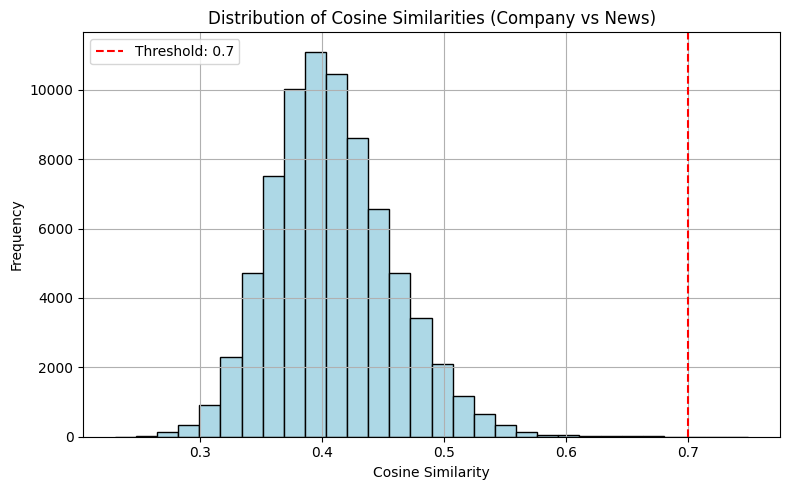

In [25]:
import matplotlib.pyplot as plt
# 히스토그램 시각화
plt.figure(figsize=(8, 5))
plt.hist(all_similarities, bins=30, color='lightblue', edgecolor='black')
plt.title("Distribution of Cosine Similarities (Company vs News)")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.grid(True)
plt.axvline(0.7, color='red', linestyle='--', label='Threshold: 0.7')
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
records_to_upload = []

for company, news_df in top_news_per_company.items():
    for _, row in news_df.iterrows():
        record = {
            "company_name": company,
            "news_title": row['title'],
            "url": url,
            "news_summary": row['summary'],
            "similarity": float(row['similarity'])
        }
        records_to_upload.append(record)
